In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [3]:
columns_to_drop = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']
df.drop(columns_to_drop, inplace=True, axis=1)
df.columns = ["Category", "Message"]

In [4]:
df.columns


Index(['Category', 'Message'], dtype='object')

In [5]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [6]:
df.duplicated().sum()

403

In [7]:
df.duplicated().sum()

403

In [8]:
df = df.drop_duplicates(keep='first')
df.duplicated().sum()

0

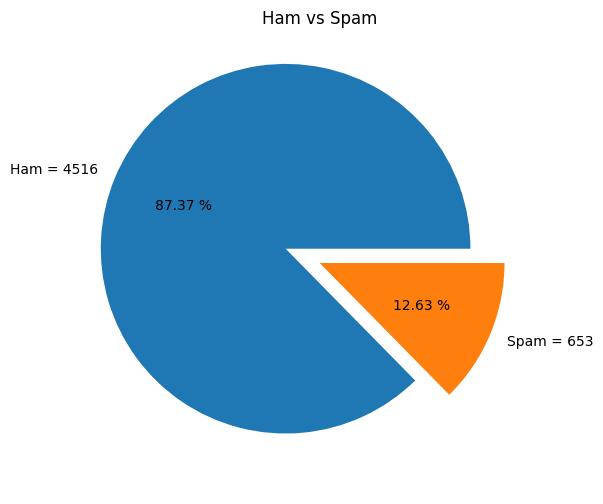

In [9]:
number_of_spam = df[df['Category'] == 'spam'].shape[0]
number_of_ham = df[df['Category'] == 'ham'].shape[0]

plt.figure(figsize=(7,6))

mail_categories = [number_of_ham, number_of_spam]
labels = [f"Ham = {number_of_ham}", f"Spam = {number_of_spam}"]
explode = [.2, 0]

plt.pie(mail_categories, labels=labels, explode=explode, autopct="%.2f %%")
plt.title("Ham vs Spam")

plt.show()


In [10]:
encoder = LabelEncoder()
df['spam'] = encoder.fit_transform(df['Category'])
df.head()


,Category,Message,spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [11]:
df.drop('Category', inplace =True, axis =1)


In [12]:
x = df['Message']
y = df['spam']

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

In [13]:
vectorizer = CountVectorizer()
x_train_counts = vectorizer.fit_transform(x_train)


In [14]:
classifier = MultinomialNB()
classifier.fit(x_train_counts, y_train)

MultinomialNB()

In [15]:
x_test_counts = vectorizer.transform(x_test)



In [16]:
y_pred = classifier.predict(x_test_counts)


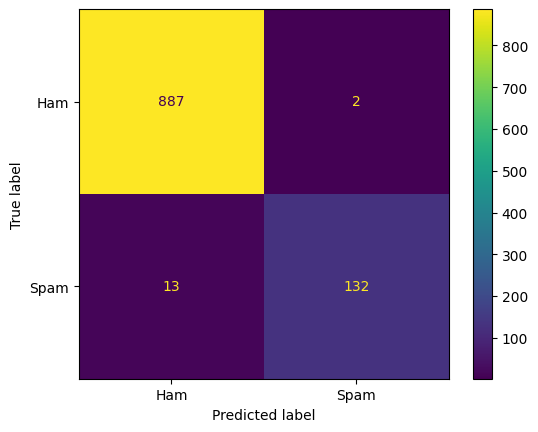

In [17]:
confusion_matrix = confusion_matrix(y_test, y_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = ["Ham", "Spam"])
cm_display.plot()
plt.show()

In [18]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       889
           1       0.99      0.91      0.95       145

    accuracy                           0.99      1034
   macro avg       0.99      0.95      0.97      1034
weighted avg       0.99      0.99      0.99      1034



In [19]:
emails = [
    "Hey Meena, I'm at the Ms.Helena class wating for you, where are you?",

    'Upto 20% discount on parking, exclusive offer just for you. Dont miss this reward!',

    "Hey Meena, wanna join my class this affternoon"
]

emails_count = vectorizer.transform(emails)
classifier.predict(emails_count)


array([0, 1, 0])